## PARKİNSON HASTALIĞIN SES VERİSİ İLE TEŞHİSİ

Ses verisinden Parkinson hastalığı tahmini

Bu çalışmada Oxford üniversitesinden araştırmacıların oluşturduğu Parkinsons veri seti üzerinde sınıflandırma çalışması yapılmaktadır.

https://archive-beta.ics.uci.edu/dataset/174/parkinsons

In [241]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import tree

In [242]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 


Öncelikle veriyi yüklüyoruz.

In [243]:
df = pd.read_csv("./parkinson.csv", sep=";")
# Boş olan veriyi silme
df.dropna(inplace = True)
#Veriyi nümerik hale getirme
df = df._get_numeric_data()
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,11999200,15730200,7499700,784,7,370,554,1109,4374,42600,...,6545,2211,2103300,1,414783,815285,-4813031,266482,2301442,284654
1,12240000,14865000,11381900,968,8,465,696,1394,6134,62600,...,9403,1929,1908500,1,458359,819521,-4075192,335590,2486855,368674
2,11668200,13111100,11155500,1050,9,544,781,1633,5233,48200,...,8270,1309,2065100,1,429895,825288,-4443179,311173,2342259,332634
3,11667600,13787100,11136600,997,9,502,698,1505,5492,51700,...,8771,1353,2064400,1,434969,819235,-4117501,334147,2405554,368975
4,11601400,14178100,11065500,1284,11,655,908,1966,6425,58400,...,10470,1767,1964900,1,417356,823484,-3747787,234513,2332180,410335


Sürekli değişkenlerin ortalaması aşağıdaki gibidir.

In [244]:
mean_vec = np.mean(X, axis=0)
mean_vec

array([ 227.51   ,  318.24   ,  742.51   , 1068.57   , 2210.66   ,
        196.07863,  767.44   ])

Sürekli değişkenlerin minimum ve maksimum noktaları

In [245]:
list=["MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:PPQ","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:DDA","NHR","HNR","RPDE","DFA","spread2","MDVP:RAP","MDVP:APQ","Shimmer:APQ5","Jitter:DDP","MDVP:Flo(Hz)","D2","MDVP:Fhi(Hz)","MDVP:Fo(Hz)","spread1","PPE"]
for i in list: 
    print(i,"min-max",df[i].min(),"-",df[i].max())

MDVP:Jitter(%) min-max 168 - 3316
MDVP:Jitter(Abs) min-max 1 - 26
MDVP:PPQ min-max 92 - 1958
MDVP:Shimmer min-max 954 - 11908
MDVP:Shimmer(dB) min-max 8500 - 130200
Shimmer:APQ3 min-max 455 - 5647
Shimmer:DDA min-max 1364 - 16942
NHR min-max 65 - 31482
HNR min-max 844100 - 3304700
RPDE min-max 256570 - 685151
DFA min-max 574282 - 825288
spread2 min-max 6274 - 450493
MDVP:RAP min-max 68 - 2144
MDVP:APQ min-max 719 - 13778
Shimmer:APQ5 min-max 570 - 7940
Jitter:DDP min-max 204 - 6433
MDVP:Flo(Hz) min-max 6547600 - 23917000
D2 min-max 1423287 - 3671155
MDVP:Fhi(Hz) min-max 10214500 - 59203000
MDVP:Fo(Hz) min-max 8833300 - 26010500
spread1 min-max -7964984 - -2434031
PPE min-max 44539 - 527367


Sürekli değişkenlerin normal dağılıp dağılmadığına bakmak için çarpıklık ve basıklık katsayısına bakalım. 

In [246]:
from scipy import stats
list=["MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:PPQ","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:DDA","NHR","HNR","RPDE","DFA","spread2","MDVP:RAP","MDVP:APQ","Shimmer:APQ5","Jitter:DDP","MDVP:Flo(Hz)","D2","MDVP:Fhi(Hz)","MDVP:Fo(Hz)","spread1","PPE"]
for i in list: 
    print(i,"Skewness:", stats.skew(df[i]),"Kurtosis: ", stats.kurtosis(df[i]),"P:value",stats.shapiro(df[i])[1])

MDVP:Jitter(%) Skewness: 3.0611649573863304 Kurtosis:  11.69404812271481 P:value 6.427849934148239e-19
MDVP:Jitter(Abs) Skewness: 2.3944220439912383 Kurtosis:  9.07977570880642 P:value 1.9323769201527036e-15
MDVP:PPQ Skewness: 3.0501964249676146 Kurtosis:  11.628737063088646 P:value 5.374223459029992e-19
MDVP:Shimmer Skewness: 1.6536338401467408 Kurtosis:  3.125256295101768 P:value 1.4874616837724786e-13
MDVP:Shimmer(dB) Skewness: 1.9839757449583981 Kurtosis:  4.967028761983706 P:value 5.64582230047476e-15
Shimmer:APQ3 Skewness: 1.5683920271611074 Kurtosis:  2.6202908467513124 P:value 4.604056936044487e-13
Shimmer:DDA Skewness: 1.5684333201651857 Kurtosis:  2.6207875757870305 P:value 4.607557282758357e-13
NHR Skewness: 4.188172511855343 Kurtosis:  21.404422491186654 P:value 9.394444177169885e-23
HNR Skewness: -0.5103527250427278 Kurtosis:  0.5697407921207653 P:value 0.0006426100735552609
RPDE Skewness: -0.14229695276961735 Kurtosis:  -0.9289268859608506 P:value 0.0005725474911741912
DF

In [247]:
list=["MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:PPQ","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:DDA","NHR","HNR","RPDE","DFA","spread2","MDVP:RAP","MDVP:APQ","Shimmer:APQ5","Jitter:DDP","MDVP:Flo(Hz)","D2","MDVP:Fhi(Hz)","MDVP:Fo(Hz)","spread1","PPE"]
for i in list: 
    if stats.shapiro(df[i])[1]<0.05:
        print(i,"normal dağılıma sahip değildir")
    else:
        print(i, "normal dağılıma sahiptir")

MDVP:Jitter(%) normal dağılıma sahip değildir
MDVP:Jitter(Abs) normal dağılıma sahip değildir
MDVP:PPQ normal dağılıma sahip değildir
MDVP:Shimmer normal dağılıma sahip değildir
MDVP:Shimmer(dB) normal dağılıma sahip değildir
Shimmer:APQ3 normal dağılıma sahip değildir
Shimmer:DDA normal dağılıma sahip değildir
NHR normal dağılıma sahip değildir
HNR normal dağılıma sahip değildir
RPDE normal dağılıma sahip değildir
DFA normal dağılıma sahip değildir
spread2 normal dağılıma sahiptir
MDVP:RAP normal dağılıma sahip değildir
MDVP:APQ normal dağılıma sahip değildir
Shimmer:APQ5 normal dağılıma sahip değildir
Jitter:DDP normal dağılıma sahip değildir
MDVP:Flo(Hz) normal dağılıma sahip değildir
D2 normal dağılıma sahip değildir
MDVP:Fhi(Hz) normal dağılıma sahip değildir
MDVP:Fo(Hz) normal dağılıma sahip değildir
spread1 normal dağılıma sahip değildir
PPE normal dağılıma sahip değildir


Yukarıdaki sonuca göre spread2 değişkeni hariç normal dağılıma sahip değildir.

Histogram grafikleri ise aşağıdaki gibidir

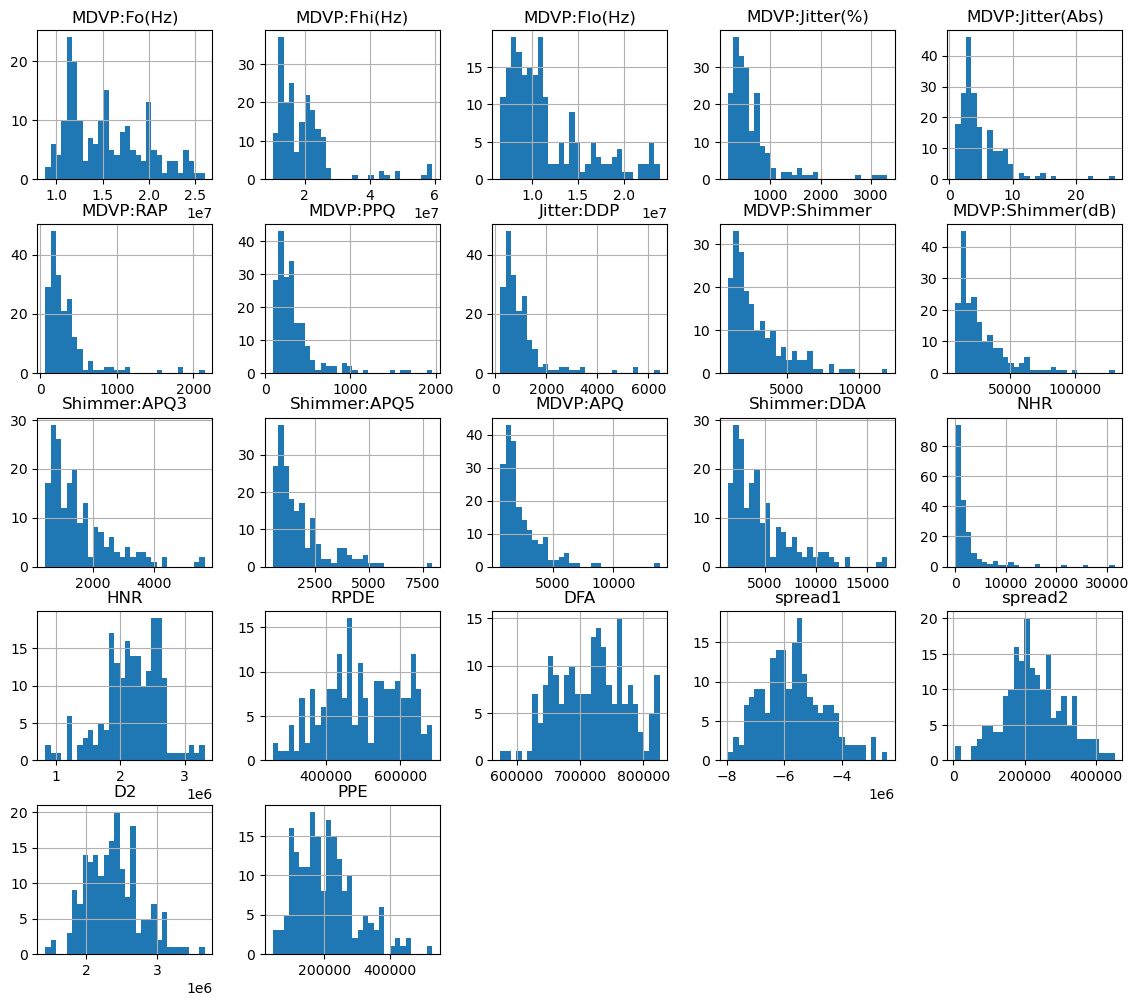

In [248]:
df_1 = pd.read_csv("./parkinson.csv", sep=";")
df_1 = df_1.drop("status", axis=1)
df_1.hist(bins=30, figsize=(14, 12))
plt.show()

In [249]:
# Dataya ait bilgiler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,1.542286e+07,4.139006e+06,8833300.0,11757200.0,14879000.0,18276900.0,26010500.0
MDVP:Fhi(Hz),195.0,1.971049e+07,9.149155e+06,10214500.0,13486250.0,17582900.0,22420550.0,59203000.0
MDVP:Flo(Hz),195.0,1.163246e+07,4.352141e+06,6547600.0,8429100.0,10431500.0,14001850.0,23917000.0
MDVP:Jitter(%),195.0,6.220462e+02,4.848134e+02,168.0,346.0,494.0,736.5,3316.0
MDVP:Jitter(Abs),195.0,4.728205e+00,3.523555e+00,1.0,3.0,4.0,6.0,26.0
MDVP:RAP,195.0,3.306410e+02,2.967774e+02,68.0,166.0,250.0,383.5,2144.0
MDVP:PPQ,195.0,3.446359e+02,2.758977e+02,92.0,186.0,269.0,395.5,1958.0
Jitter:DDP,195.0,9.919949e+02,8.903344e+02,204.0,498.5,749.0,1150.5,6433.0
MDVP:Shimmer,195.0,2.970913e+03,1.885693e+03,954.0,1650.5,2297.0,3788.5,11908.0
MDVP:Shimmer(dB),195.0,2.822513e+04,1.948773e+04,8500.0,14850.0,22100.0,35000.0,130200.0


##  PRINCIPAL COMPONENT ANALYSİS (PCA)

Veriye normalizasyon uygulayarak standardize ediyoruz ve pca uyguluyoruz. Bileşen sayısı ve katkısı ilişkisi aşağıdaki grafikle gösterilmiştir.


Text(0, 0.5, 'Kümülatif Varyans Oranı')

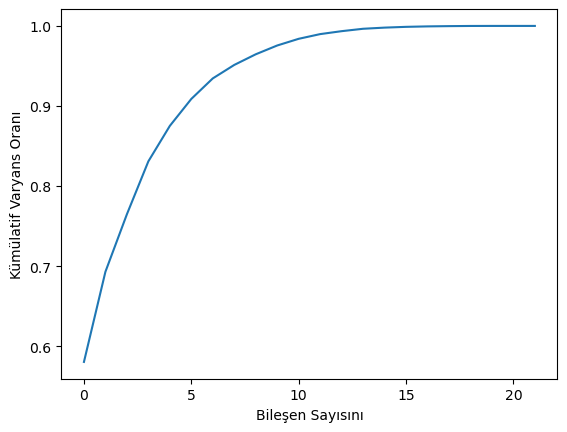

In [250]:
X=df.drop(["status"], axis = 1)
y = df["status"]
X_std=StandardScaler().fit_transform(X)
pca= PCA().fit(X_std)
pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı")

#Bu figürde x ekseni kafamı karıştırıyor, 1 den başlamalı gibi hissediyorum....
# Bu kısımda 0 dan başlaması etiket gibi aslında 0 olan yer 1 bileşen aldığımda diye devam etmem gerekiyor yani bileşeni sayısını 1 artırarak devam etmeliyiz. ya da grafiği tekrar biçimlendirmeliyiz.


In [251]:
pca = PCA(n_components = 5)
pca_fit = pca.fit_transform(X_std)
varyans_orani=pca.explained_variance_ratio_
print("Varyans oranları: ", varyans_orani)
print("Kümülatif varyans oranı: " , sum(pca.explained_variance_ratio_))

Varyans oranları:  [0.58051395 0.11256558 0.07176687 0.06608334 0.04427379]
Kümülatif varyans oranı:  0.8752035209628071


In [252]:
df_sns=pd.DataFrame({"PC":["PC1","PC2","PC3","PC4","PC5"],
                     "var": pca.explained_variance_ratio_})
df_sns

,PC,var
0,PC1,0.580514
1,PC2,0.112566
2,PC3,0.071767
3,PC4,0.066083
4,PC5,0.044274


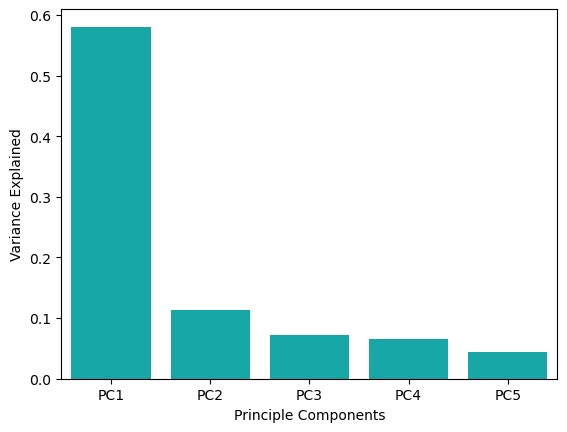

In [253]:
sns.barplot(x="PC", y="var", data=df_sns,color="c")
plt.ylabel("Variance Explained")
plt.xlabel("Principle Components")
plt.show()

Yukarıdaki grafiğe göre bileşen sayısının 5 ten fazla oluşu veriye ihmal edilebilecek bir katkı sağlamaktadır. Şimdi pca uygulanmış verinin ilk iki bileşenini birbirine göre çizdirelim. Burada sarı noktalar parkinson tanısı almış kişileri, mor noktalar sağlıklı kişileri temsil etmektedir.


In [254]:
pca = PCA(n_components = 5)
pca_fit = pca.fit_transform(df)

In [255]:
bilesen_df = pd.DataFrame(data = pca_fit, columns = ["birinci_bilesen","ikinci_bilesen","ücüncü_bilesen","dördüncü_bilesen","besinci_bilesen"])
bilesen_df

,birinci_bilesen,ikinci_bilesen,ücüncü_bilesen,dördüncü_bilesen,besinci_bilesen
0,-4.986049e+06,-4.500781e+06,-3.817224e+05,3.292010e+05,-203612.596112
1,-5.459520e+06,-1.241444e+06,1.743668e+06,1.396693e+06,-209381.400328
2,-7.304501e+06,-1.358696e+06,1.822925e+06,9.347237e+05,-231012.903006
3,-6.654229e+06,-1.542573e+06,1.904842e+06,1.242019e+06,-323218.184064
4,-6.301281e+06,-1.752281e+06,1.973831e+06,1.576639e+06,-441063.809042
...,...,...,...,...,...
190,3.566025e+06,-1.152067e+06,-2.533291e+06,-6.845358e+05,520033.476889
191,6.449174e+06,7.082460e+04,-5.276898e+06,-1.349942e+05,269743.724901
192,4.291665e+06,-2.837471e+06,-3.710500e+06,-9.895497e+05,715218.035985
193,2.007136e+07,-4.559102e+06,-3.545412e+06,-1.083102e+06,192976.555271


In [256]:
Xt=PCA(n_components=5).fit_transform(X_std)

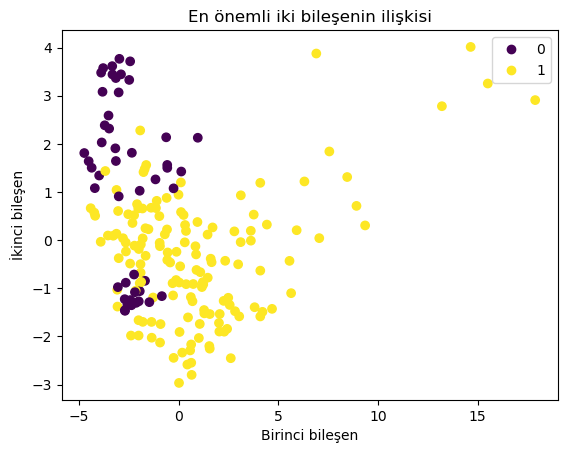

In [257]:
plot = plt.scatter(Xt[:,0],Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=["0","1"])

plt.xlabel("Birinci bileşen")
plt.ylabel("İkinci bileşen")
plt.title("En önemli iki bileşenin ilişkisi")
plt.show()

logaritma dönüşü yapıldığında grafik aşağıdaki gibidir.

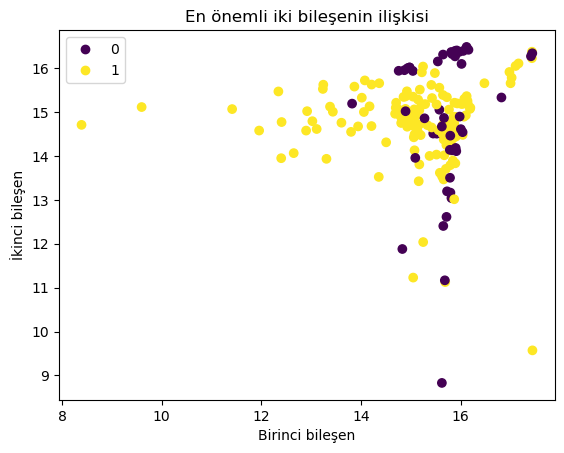

In [258]:
plot = plt.scatter(np.log(abs(bilesen_df["birinci_bilesen"])),np.log(abs(bilesen_df["ikinci_bilesen"])), c=y)
plt.legend(handles=plot.legend_elements()[0], labels=["0","1"])

plt.xlabel("Birinci bileşen")
plt.ylabel("İkinci bileşen")
plt.title("En önemli iki bileşenin ilişkisi")
plt.show()

Şimdi de bileşen sayısını 3 e çıkardığımızda verinin nasıl görselleştirildiğini görelim.


Text(0.5, 0, 'r')

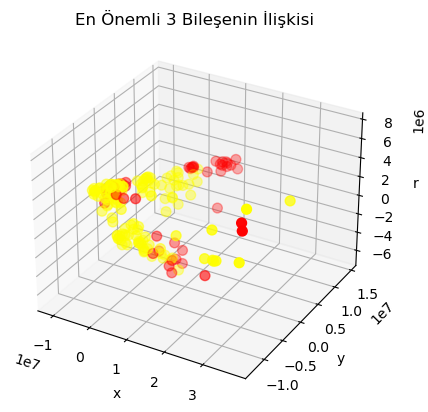

In [259]:
from mpl_toolkits import mplot3d

ax = plt.subplot(projection='3d')
ax.scatter3D(bilesen_df["birinci_bilesen"],bilesen_df["ikinci_bilesen"],bilesen_df["ücüncü_bilesen"], c=y, s=50, cmap='autumn')
plt.title("En Önemli 3 Bileşenin İlişkisi")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')


logaritma dönüşümü altındaki grafiği

Text(0.5, 0, 'r')

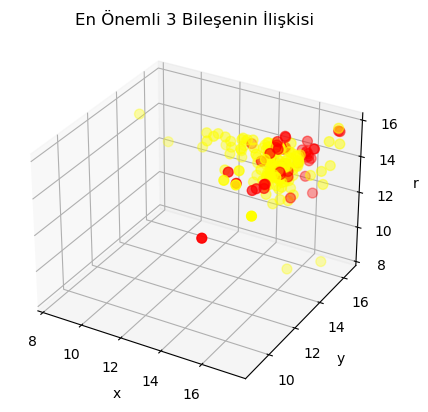

In [260]:
from mpl_toolkits import mplot3d

ax = plt.subplot(projection='3d')
ax.scatter3D(np.log(abs(bilesen_df["birinci_bilesen"])),np.log(abs(bilesen_df["ikinci_bilesen"])),np.log(abs(bilesen_df["ücüncü_bilesen"])), c=y, s=50, cmap='autumn')
plt.title("En Önemli 3 Bileşenin İlişkisi")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

Sonuç olarak PCA sonucunda bileşen sayısı 5 alınmıştır.

## SINIFLANDIRMA MODELLERİ

In [261]:
X = df.drop(["status"], axis = 1)    
y = df["status"]
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)
Xt_train=PCA(n_components=5).fit_transform(X_train)
Xt_test=PCA(n_components=5).fit_transform(X_test)
svm = SVC()


In [262]:
svm = SVC()
svm_params = {"C": [0.1, 1, 10 ,100], "kernel": ["linear","rbf","poly","sigmoid"], "gamma":[0.1, 1, 10]}
svm_cv_model = GridSearchCV(svm, svm_params, cv = 10, n_jobs = -1, verbose = 2).fit(Xt_train, y_train)
svm_cv_model.best_params_


Fitting 10 folds for each of 48 candidates, totalling 480 fits


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [263]:
svm_tuned_g = SVC(kernel = "rbf", C = 10, gamma=0.1).fit(Xt_train, y_train)
y_pred_egitim = svm_tuned_g.predict(Xt_train)
y_pred_test = svm_tuned_g.predict(Xt_test)

In [264]:
accuracy_score(y_train, y_pred_egitim), accuracy_score(y_test, y_pred_test)

(0.9632352941176471, 0.6610169491525424)

In [265]:
confusion_matrix(y_train, y_pred_egitim), confusion_matrix(y_test, y_pred_test)

(array([[ 29,   4],
        [  1, 102]], dtype=int64),
 array([[ 2, 13],
        [ 7, 37]], dtype=int64))

dogruluk skorları incelendiğinde gauss çekirdeği için overfitting olduğu görünmektedir. Bu durumdan kurtulmak için bileşen sayısı arttırılabilir, test seti oranı düşürülebilir.

In [266]:
svm_l = SVC(kernel = "linear").fit(Xt_train, y_train)
y_pred_l = svm_l.predict(Xt_train)
y_pred_2 = svm_l.predict(Xt_test)
accuracy_score(y_train, y_pred_l), accuracy_score(y_test, y_pred_2)

(0.8602941176470589, 0.6779661016949152)

In [267]:
derece=[1,2,3,4,5,6,7,8,9,10]
for i in derece:
    svm_3 = SVC(C=100, kernel = "poly", degree= i).fit(Xt_train, y_train)
    y_pred_3 = svm_3.predict(Xt_train)
    y_pred_4 = svm_3.predict(Xt_test)
    print( i,accuracy_score(y_train, y_pred_3),accuracy_score(y_test, y_pred_4))


1 0.8676470588235294 0.6779661016949152
2 0.8676470588235294 0.6271186440677966
3 0.9558823529411765 0.7288135593220338
4 0.9264705882352942 0.5932203389830508
5 0.9191176470588235 0.7796610169491526
6 0.9117647058823529 0.6101694915254238
7 0.9044117647058824 0.7627118644067796
8 0.8897058823529411 0.6440677966101694
9 0.8823529411764706 0.7796610169491526
10 0.8823529411764706 0.6610169491525424


## K-NN

In [268]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors": np.arange(1,50), "metric": ["euclidean", "manhattan", "minkowski"] }
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(Xt_train, y_train)
knn_cv_model.best_params_

{'metric': 'euclidean', 'n_neighbors': 1}

In [269]:
knn = KNeighborsClassifier(n_neighbors = 11, metric="euclidean").fit(Xt_train, y_train)
knn_tuned = KNeighborsClassifier(n_neighbors = 13 ,metric="manhattan").fit(Xt_train, y_train)
knn_2 = KNeighborsClassifier(n_neighbors = 11, metric="chebyshev").fit(Xt_train, y_train)

In [270]:
y_pred_1 = knn.predict(Xt_test)
y_pred_2 = knn.predict(Xt_train)
y_pred_3 = knn_tuned.predict(Xt_test)
y_pred_4 = knn_tuned.predict(Xt_train)
y_pred_5 = knn_2.predict(Xt_test)
y_pred_6 = knn_2.predict(Xt_train)

In [271]:
test_hata = accuracy_score(y_test, y_pred_1)
egitim_hata = accuracy_score(y_train, y_pred_2)
print(test_hata, egitim_hata)

test_hata_1 = accuracy_score(y_test, y_pred_3)
egitim_hata_1 = accuracy_score(y_train, y_pred_4)
print(test_hata_1, egitim_hata_1)

test_hata_2 = accuracy_score(y_test, y_pred_5)
egitim_hata_2 = accuracy_score(y_train, y_pred_6)
print(test_hata_2, egitim_hata_2)

0.6949152542372882 0.8897058823529411
0.6949152542372882 0.9191176470588235
0.6949152542372882 0.875


## CART

In [272]:
cart_model = DecisionTreeClassifier().fit(Xt_train, y_train)

In [273]:
cart_params = {"max_depth": [1,3,5,8,10],
              "min_samples_split": [2,3,5,10,20,50]}

In [274]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10, n_jobs = -1, verbose =2).fit(Xt_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [275]:
cart_cv_model.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [276]:
cart_tuned = DecisionTreeClassifier(max_depth = 2, min_samples_split = 10).fit(Xt_train, y_train)
y_pred = cart_tuned.predict(Xt_test)
y_pred_1 = cart_tuned.predict(Xt_train)


In [277]:
accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_1)

(0.6949152542372882, 0.8897058823529411)

## RF

In [278]:
rf = RandomForestClassifier().fit(Xt_train, y_train)


In [279]:
rf_params = {"n_estimators": [100,200,500,1000],
            "max_features": [3,5,7,8],
            "min_samples_split": [2,5,10,20]}

In [280]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(Xt_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
320 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\elifc\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\elifc\AppData\R

In [281]:
rf_cv_model.best_params_

{'max_features': 5, 'min_samples_split': 2, 'n_estimators': 100}

In [282]:
rf_tuned = RandomForestClassifier(max_features = 3, 
                                  min_samples_split = 30, 
                                  n_estimators = 400).fit(Xt_train, y_train)

In [283]:
y_pred_t = rf_tuned.predict(Xt_test)
y_pred_e = rf_tuned.predict(Xt_train)

In [284]:
accuracy_score(y_test, y_pred_t), accuracy_score(y_train, y_pred_e)

(0.711864406779661, 0.9044117647058824)

## YSA

In [285]:
mlpc_model = MLPClassifier().fit(Xt_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [286]:
mlpc_params = {"alpha":[1,5, 0.1,0.01, 0.03, 0.005, 0.0001],
              "hidden_layer_sizes": [(10,10), (100,100,100), (100,100), (3,5)]}

In [287]:
mlpc = MLPClassifier(solver = "lbfgs", activation = "logistic")

In [288]:
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv = 10, n_jobs = -1, verbose = 2).fit(Xt_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [289]:
mlpc_cv_model.best_params_

{'alpha': 0.03, 'hidden_layer_sizes': (100, 100)}

In [290]:
liste = ['identity', 'logistic', 'relu', 'tanh']
for i in liste:
    mlpc_tuned = MLPClassifier(solver = "lbfgs",activation=i, alpha = 1, hidden_layer_sizes = (20,5)).fit(Xt_train, y_train)
    y_pred = mlpc_tuned.predict(Xt_test)
    y_pred_5 = mlpc_tuned.predict(Xt_train)
    print(accuracy_score(y_test, y_pred),accuracy_score(y_train, y_pred_5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.711864406779661 0.8455882352941176
0.7457627118644068 0.8308823529411765
0.6101694915254238 1.0
0.6610169491525424 0.9926470588235294


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [291]:
mlpc_tuned = MLPClassifier(solver = "lbfgs",activation="logistic", alpha = 1, hidden_layer_sizes = (20,5)).fit(Xt_train, y_train)

In [292]:
y_pred_m = mlpc_tuned.predict(Xt_test)
y_pred_5 = mlpc_tuned.predict(Xt_train)

In [293]:
accuracy_score(y_test, y_pred_m),accuracy_score(y_train, y_pred_5)

(0.7288135593220338, 0.8529411764705882)

## Logistic Regression

In [294]:
loj_model = LogisticRegression(solver = "liblinear").fit(Xt_train,y_train)
loj_model.intercept_

array([1.97041185])

In [295]:
loj_model.coef_

array([[ 0.52729827, -0.66638508,  0.35370007, -0.68110202, -0.67677727]])

In [296]:
y_pred = loj_model.predict(Xt_test)
y_pred_l = loj_model.predict(Xt_train)

In [297]:
accuracy_score(y_train, y_pred_l), accuracy_score(y_test, y_pred)

(0.8455882352941176, 0.711864406779661)

Modeller incelendiğinde overfitting meydana geldiği görünmektedir. Bu durumda bileşen sayısı arttırılarak 7 alındı.
Test oranı ise %20' ye düşürülmüştür.

Overfitting sonrası oluşturulan modeller aşağıdaki gibidir.

In [298]:
X = df.drop(["status"], axis = 1)    
y = df["status"]
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)
Xt_train=PCA(n_components=7).fit_transform(X_train)
Xt_test=PCA(n_components=7).fit_transform(X_test)
svm = SVC()


In [299]:
Xt_train=PCA(n_components=7).fit_transform(X_train)
Xt_test=PCA(n_components=7).fit_transform(X_test)

In [300]:
bilesen_df = pd.DataFrame(data = Xt_train, columns = ["birinci_bilesen","ikinci_bilesen","ücüncü_bilesen","dördüncü_bilesen","besinci_bilesen","altıncı_bilesen","yedinci_bilesen"])
bilesen_df

,birinci_bilesen,ikinci_bilesen,ücüncü_bilesen,dördüncü_bilesen,besinci_bilesen,altıncı_bilesen,yedinci_bilesen
0,2.893893,-1.716848,1.583303,-1.654209,-0.455439,0.667411,0.281849
1,1.511059,-1.514127,-1.631742,-0.144418,0.485411,-0.826529,0.311093
2,1.541826,-0.465075,0.059426,-0.059281,1.714200,0.822749,0.116086
3,-2.802345,3.838671,-0.282286,-0.578545,0.680717,-1.353547,1.113727
4,0.979121,0.386522,-2.243884,-1.253501,-0.546131,-0.767604,0.105377
...,...,...,...,...,...,...,...
151,-3.999992,0.597704,0.471409,-0.154969,-0.244191,-0.138548,-0.527664
152,-2.304530,-0.408119,-0.653590,0.985045,0.384967,0.017559,-0.457033
153,0.213305,0.474696,0.044298,-1.133731,1.822187,0.199439,-0.616017
154,-1.754056,-0.554387,0.158377,-0.813908,-1.683591,-0.004381,-0.845166


## SVM

In [301]:
svm = SVC()
svm_tuned_2 = SVC(kernel = "poly", degree=9, C=100).fit(Xt_train, y_train)
y_pred_2 = svm_tuned_2.predict(Xt_test)
y_pred_1 = svm_tuned_2.predict(Xt_train)

In [302]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.91      0.97      0.94        32

    accuracy                           0.90        39
   macro avg       0.86      0.77      0.80        39
weighted avg       0.89      0.90      0.89        39



Precision değeri tahminlerden kaçının doğru sınıflandırıldığını gösterir.
hasta olmayan insanların %80 nini, hasta olanların ise %91 doğru sınıflandırmış
Recall ölçüsü ise sınıfların tahmin edilme başarısını verir. 0 sınıfı için
tahmin edilmesi gereken değerlerin ne kadarını doğru tahmin ettiğini gösterir.
0 sınıfı için 7 kişiden 4' ünü doğru sınıflandırabilmiş ve 4/7=0.57' dir.
Hasta olmayan kişilerin yani 0 sınıfının recall değerine bakıldığında tahmin edilme başarısı oldukça düşüktür.
Recall değeri şu şekilde yorumlanır. 0 sınıfı olarak tahmin ettiklerimin kaçını doğru sınıflandırabilmişim
100 adet 0 veri alındığında 57 tanesi aslında 1 sınıfına aittir.
f1- score ise recall ve precision değerlerinin harmonik ortalamasını ifade eder.
Support ise gerçek değerlerinin sayısını ifade etmektedir.

In [303]:
accuracy_score(y_test, y_pred_2), accuracy_score(y_train, y_pred_1)

(0.8974358974358975, 0.8782051282051282)

In [304]:
confusion_matrix(y_test, y_pred_2)

array([[ 4,  3],
       [ 1, 31]], dtype=int64)

Polinom çekirdeğinin test setinin görselleştirilmesi

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


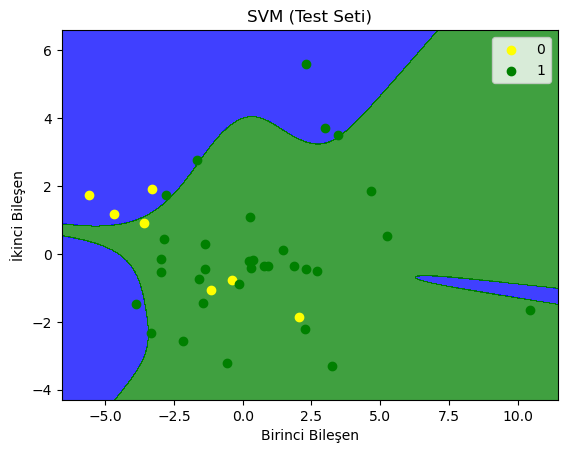

In [305]:
svm =  SVC(kernel = 'poly', C = 100, degree=9,random_state = 0)
svm.fit(Xt_train[:,0:2],y_train)
y_pred = svm.predict(Xt_test[:,0:2])
from matplotlib.colors import ListedColormap
X_set, y_set = Xt_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('SVM (Test Seti)')
plt.xlabel('Birinci Bileşen')
plt.ylabel('İkinci Bileşen')
plt.legend()
plt.show()




Polinom çekirdeğinin eğitim setinin görselleştirilmesi

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


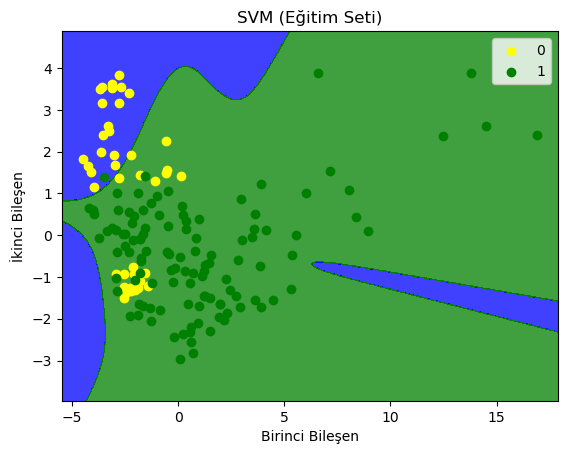

In [306]:
svm =  SVC(kernel = 'poly', C = 100, degree=9, random_state = 0)
svm.fit(Xt_train[:,0:2],y_train)
y_pred = svm.predict(Xt_train[:,0:2])

from matplotlib.colors import ListedColormap
X_set, y_set = Xt_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('SVM (Eğitim Seti)')
plt.xlabel('Birinci Bileşen')
plt.ylabel('İkinci Bileşen')
plt.legend()
plt.show()




## K-NN

In [307]:
knn_2 = KNeighborsClassifier(n_neighbors = 11, metric="chebyshev").fit(Xt_train, y_train)

In [308]:
y_pred_5 = knn_2.predict(Xt_test)
y_pred_6 = knn_2.predict(Xt_train)

In [309]:
accuracy_score(y_test, y_pred_5), accuracy_score(y_train, y_pred_6)

(0.8461538461538461, 0.8974358974358975)

In [310]:
confusion_matrix(y_test, y_pred_5)

array([[ 3,  4],
       [ 2, 30]], dtype=int64)

In [311]:
print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.88      0.94      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.68      0.70        39
weighted avg       0.83      0.85      0.84        39



## CART

In [312]:
cart_tuned = DecisionTreeClassifier(max_depth = 2, min_samples_split = 10).fit(Xt_train, y_train)
y_pred = cart_tuned.predict(Xt_test)
y_pred_1 = cart_tuned.predict(Xt_train)


In [313]:
accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_1)

(0.8461538461538461, 0.8974358974358975)

In [314]:
confusion_matrix(y_test, y_pred)

array([[ 3,  4],
       [ 2, 30]], dtype=int64)

In [315]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.88      0.94      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.68      0.70        39
weighted avg       0.83      0.85      0.84        39



In [316]:
def fastModel(x, y):
    """
    verisetini test ve train olarak ayıran fonksiyon
    bu veri setleri üzerine karar ağacını modelini uygular
    train ve test verisinden çıkan sonuçlar karşılaştırılır
    :param x: girdi değişkenler
    :param y: çıktı değişken
    :return: Accuracy, Model, X ve y train veri setleri
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y
                                                        ,test_size=0.20
                                                        ,random_state=40
                                                        ,stratify=y)
    
    Xt_train=PCA(n_components=6).fit_transform(X_train)
    Xt_test=PCA(n_components=6).fit_transform(X_test)
    # algoritma sınıfını çağırılıyor
    dc = DecisionTreeClassifier(max_depth = 2, min_samples_split = 10)

    # modeli uygulanıyor
    model = dc.fit(Xt_train, y_train)

    # model test veri seti üzerine uygulanıyor
    y_pred = model.predict(Xt_test)

    # accuracy hesaplanıyor
    accuracy = metrics.accuracy_score(y_test,y_pred)

    return accuracy, model, Xt_train, y_train

In [317]:
def showTreeText(model, save = False):
  
    """
    model fonksiyonundaki çıktıyı kullanır
    isternirse sonuçlar kaydedilebilir
    :param model: fastModel fonksiyonundan gelen veri
    :param save: True olursa ortamınıza decistion_tree.txt olarak kaydedilir
    :return: text formatında data
    """
    feature_names= ["birinci_bilesen","ikinci_bilesen","ücüncü_bilesen","dördüncü_bilesen","besinci_bilesen","altıncı_bilesen","yedinci_bilesen"]
    text_representation = tree.export_text(model, feature_names=feature_names)
    
    if save == True:
        with open("decistion_tree.txt", "w") as text:
            text.write(text_representation)
            
    return text_representation

In [318]:
print(showTreeText(cart_tuned))

|--- ikinci_bilesen <= 1.13
|   |--- birinci_bilesen <= -1.37
|   |   |--- class: 1
|   |--- birinci_bilesen >  -1.37
|   |   |--- class: 1
|--- ikinci_bilesen >  1.13
|   |--- birinci_bilesen <= 2.01
|   |   |--- class: 0
|   |--- birinci_bilesen >  2.01
|   |   |--- class: 1



In [319]:
showTreeText(cart_tuned, save = True)


'|--- ikinci_bilesen <= 1.13\n|   |--- birinci_bilesen <= -1.37\n|   |   |--- class: 1\n|   |--- birinci_bilesen >  -1.37\n|   |   |--- class: 1\n|--- ikinci_bilesen >  1.13\n|   |--- birinci_bilesen <= 2.01\n|   |   |--- class: 0\n|   |--- birinci_bilesen >  2.01\n|   |   |--- class: 1\n'

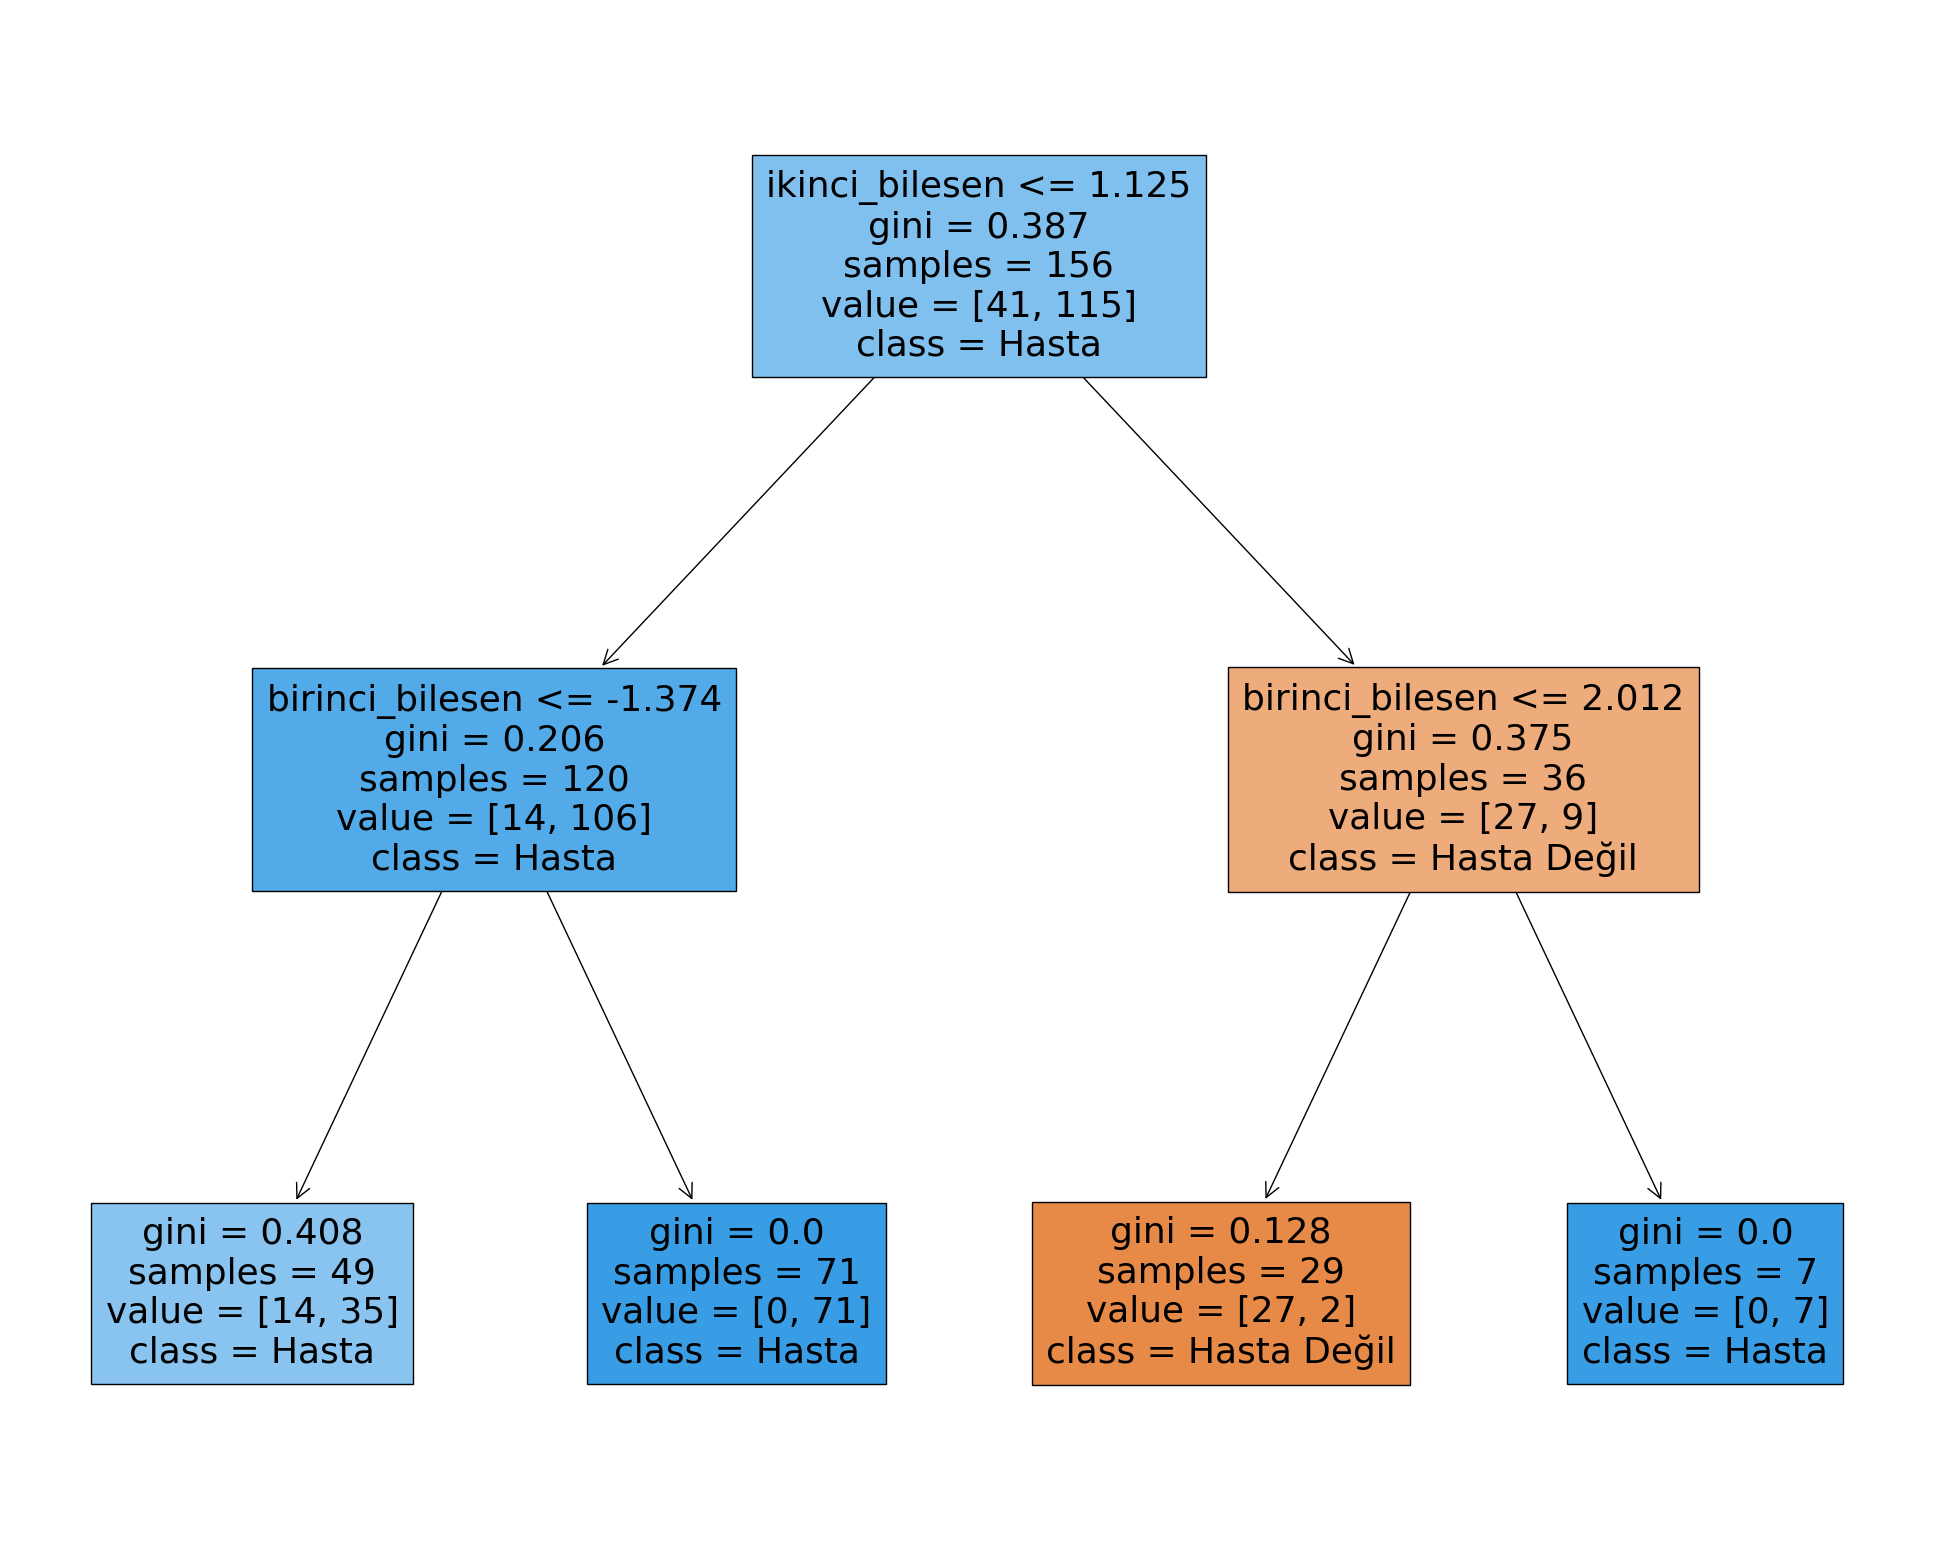

In [320]:
feature_names= ["birinci_bilesen","ikinci_bilesen","ücüncü_bilesen","dördüncü_bilesen","besinci_bilesen","altıncı_bilesen","yedinci_bilesen"]
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(cart_tuned,
                   feature_names=feature_names,
                   class_names=["Hasta Değil", "Hasta"],
                   filled=True)
plt.show()

## RF

In [321]:
rf_tuned = RandomForestClassifier(max_features = 3, 
                                  min_samples_split = 30, 
                                  n_estimators = 400).fit(Xt_train, y_train)

In [322]:
y_pred_t = rf_tuned.predict(Xt_test)
y_pred_e = rf_tuned.predict(Xt_train)

In [323]:
accuracy_score(y_test, y_pred_t), accuracy_score(y_train, y_pred_e)

(0.8461538461538461, 0.8846153846153846)

In [324]:
confusion_matrix(y_test, y_pred_t)

array([[ 3,  4],
       [ 2, 30]], dtype=int64)

In [325]:
print(classification_report(y_test, y_pred_t))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.88      0.94      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.68      0.70        39
weighted avg       0.83      0.85      0.84        39



## YSA

In [326]:
mlpc_tuned = MLPClassifier(solver = "lbfgs",activation="logistic", alpha = 1, hidden_layer_sizes = (20,5)).fit(Xt_train, y_train)
y_pred = mlpc_tuned.predict(Xt_test)
y_pred_5 = mlpc_tuned.predict(Xt_train)


In [327]:
    print(accuracy_score(y_test, y_pred),accuracy_score(y_train, y_pred_5))

0.8717948717948718 0.8717948717948718


In [328]:
confusion_matrix(y_test, y_pred)

array([[ 4,  3],
       [ 2, 30]], dtype=int64)

In [329]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



## Logistic Regression

In [330]:
loj_model = LogisticRegression(solver = "liblinear").fit(Xt_train,y_train)
loj_model.intercept_

array([1.81690774])

In [331]:
loj_model.coef_

array([[ 0.57573284, -0.73600302, -0.35230083, -0.37910126, -0.7883077 ,
         0.09372298, -0.71737375]])

In [332]:
y_pred = loj_model.predict(Xt_test)
y_pred_l = loj_model.predict(Xt_train)

In [333]:
accuracy_score(y_train, y_pred_l), accuracy_score(y_test, y_pred)

(0.8589743589743589, 0.7948717948717948)

In [334]:
confusion_matrix(y_test, y_pred)

array([[ 4,  3],
       [ 5, 27]], dtype=int64)

In [335]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.57      0.50         7
           1       0.90      0.84      0.87        32

    accuracy                           0.79        39
   macro avg       0.67      0.71      0.69        39
weighted avg       0.82      0.79      0.80        39



Modellerin overfitting olduğu anlaşıldıktan sonra ilk PCA analizi yapılan kısımda bileşen sayısı 7 ve test oranı 0.20 alınarak modellerin en iyi parametre değerleri bulunmuştur. Daha sonra aşağıda yer alan kısımda en iyi parametre değerleri yazılarak tuned edilmiş modeller belirlenmiştir. 

In [336]:
modeller = ["SVM", "Logistic Regresyon","K-NN","CART","Random Forest", "YSA"]

sonuc = []
sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])
sonuc = pd.DataFrame([["SVM", 89.74],
           ["Logistic Regresyon", 79.48],
           ["K-NN",84.6],
           ["CART",84.6],
           ["RF",84.6],
           ["YSA", 87.1]], columns= ["Modeller","Accuracy"])
sonuclar = sonuclar.append(sonuc)

In [337]:
sonuclar

,Modeller,Accuracy
0,SVM,89.74
1,Logistic Regresyon,79.48
2,K-NN,84.60
3,CART,84.60
4,RF,84.60
5,YSA,87.10


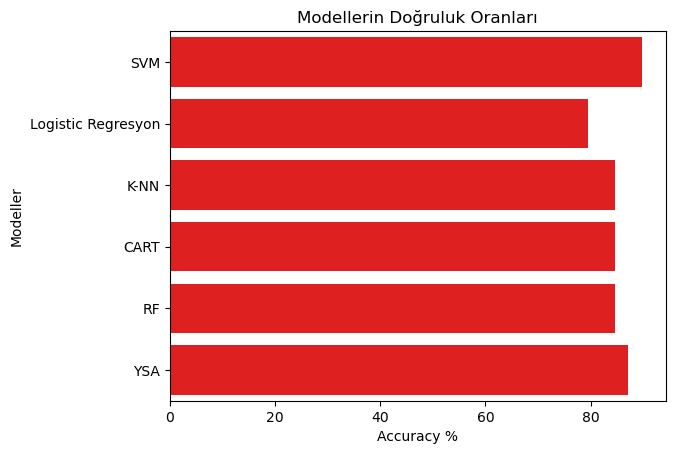

In [338]:
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuc, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');

Sonuç olarak doğruluk skorları ve hata matrisleri incelendiğinde en iyi modelin SVM olduğu kanısına varılmıştır.


## Modelin Denenmesi

8 kişiden 10 adet ses kayıt edilmiştir. Praat ile kaydedilen seslerin analizleri yapılmıştır ve predict komutu ile sınıfları tahmin edilmeye çalışılmıştır. Analiz sonucu ise veri seti haline getirilmiştir. Modeli denemek için oluşturulan veri setine deneme_seti adı verilmiştir.

In [346]:
df_1 = pd.read_csv("./deneme_seti.csv")
# Boş olan veriyi silme
df_1.dropna(inplace = True)
df_1.head()

,name,MDVP:Jitter(%),Jitter:DDP,Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA,NHR,HNR
0,Tahsin,305.3,449.0,984.0,1481.3,2951.9,473.2380,420.7
1,Kerem,621.2,1056.3,1055.3,1356.8,3165.9,216.6680,712.9
2,Melike,102.2,74.5,676.4,1569.0,2029.3,157.5750,802.6
3,Nihal,213.5,339.1,524.5,712.4,1573.4,29.0036,847.9
4,Beyza,129.0,204.8,748.6,937.4,2245.7,174.4810,928.4


In [347]:
#Veriyi nümerik hale getirme
df_1 = df_1._get_numeric_data()
df_1.head()

,MDVP:Jitter(%),Jitter:DDP,Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA,NHR,HNR
0,305.3,449.0,984.0,1481.3,2951.9,473.2380,420.7
1,621.2,1056.3,1055.3,1356.8,3165.9,216.6680,712.9
2,102.2,74.5,676.4,1569.0,2029.3,157.5750,802.6
3,213.5,339.1,524.5,712.4,1573.4,29.0036,847.9
4,129.0,204.8,748.6,937.4,2245.7,174.4810,928.4


In [348]:
svm_3 = SVC(C=100, kernel = "poly",degree=9).fit(Xt_train, y_train)

In [349]:
X=[[305.3,449,984,1481.3,2951.9,473.238,420.7],
   [621.2,1056.3,1055.3,1356.8,3165.9,216.668,712.9],
   [102.2,74.5,676.4,1569,2029.3,157.575,802.6],
   [213.5,339.1,524.5,712.4,1573.4,29.0036,847.9],
   [129,204.8,748.6,937.4,2245.7,174.4810,928.4],
   [161.4,227.1,604.2,845.0,1812.6,289.6370,709.9],
   [138.7,181.2,492.4,727.6,1477.3,22.9050,921.6],
   [185,257.7,412.3,714.7,1236.8,13.0805,1199.0],
   [201.1,314.1,668.5,1009.4,2005.4,20.0690,904.6],
   [217.9,104.5,313.6,588.4,772.2,28.9388,820.1]]
for i in X:
    prediction = svm_3.predict([i])
    print(prediction)

[1]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
